# Data Notebook
This notebook documents the data produced for the paper titled "Photonic Down Conversion Mediated by Excited State Vibrational Polaritons".
The 'twa_model.py' provides the functional code for modeling excited state vibrational polaritons using the truncated Wigner Approximation (TWA). As described in the paper the, TWA for harmonic systems such as the one being modeled here is exact. The model  is essentially just an evaluation of analytical expressions for occupation values. The only numerical calculations is for the eigenvalue decomposition of the Hessian matrix that gives the uncoupled polariton modes and their frequencies

In [32]:
import twa_model as twa
import matplotlib.pyplot as plt
import numpy as np

def plot_params():
    plt.gca().spines['left'].set_linewidth(2)
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('time / ps', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel(r'$\langle N_{x} \rangle$', fontsize=20)
    plt.xticks(fontsize=16)
    plt.gca().xaxis.set_tick_params(width=2)
    plt.gca().yaxis.set_tick_params(width=2)
    legend = plt.legend(title='$x = $', loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, fontsize=16)
    legend.get_title().set_fontsize('20')
    legend.get_frame().set_edgecolor('black')

## Isolated System
The 'parameters' dictionary stores all relevant parameters for the model. Below the field and bath sizes are set two zero so that the cavity-vibration system is isolated from any environment.

In [30]:
k2eV = 4.55633e-6  # converts wavenumbers (cm-1) to atomic units (A.U.)
parameters = {'cavity freq': 1600 * k2eV,  # (cm-1) -> (A.U.)
              'vibration freq': 1600 * k2eV,  # (cm-1) -> (A.U.)
              'Huang-Rhys': 1,
              'coupling': 0.04e-3,  # (A.U)
              'final time': 10,  # (ps)
              'time steps': 4000,
              'field size': 0,
              'bath size': 0,
              'res range': 878 * k2eV,  # (cm-1) -> (A.U.)
              'vibration lifetime': 2,  # (ps)
              'Q': 1600  # Cavity quality factor
              }

## 'twa_model.py' Functions
* **'polariton_modes'** calculates the polariton modes and frequencies.

* **'pol_displacement'** calculates the potential minumum along each polariton mode.
* **'oc_dynamics'** calculates the time evolved occupation values for the different subsystems determined by the 'subsystem' argument which can be either 'cavity', 'vibration', 'field or 'bath'.

Below the cavity and vibration occupation values are calculated for the isolated system.

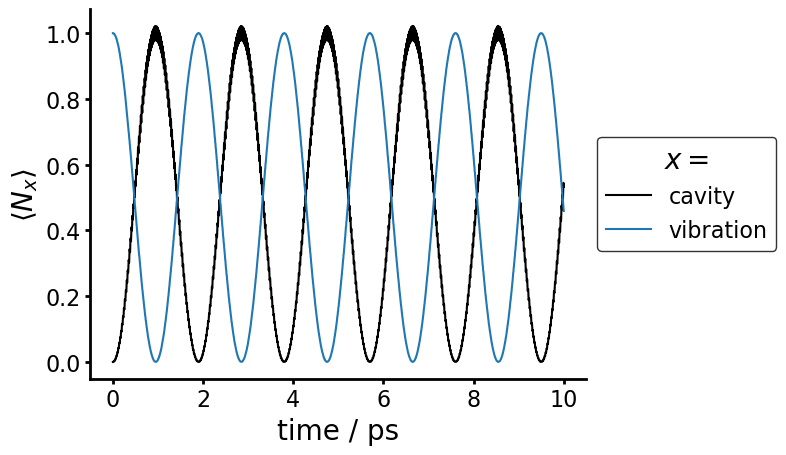

In [31]:
polEn, polStates, siteEn = twa.polariton_modes(parameters)
polDispl = twa.pol_displacement(parameters, polEn, polStates, siteEn)
nCav = twa.oc_dynamics(parameters, polEn, polStates, siteEn, polDispl, subsystem='cavity')
nVib = twa.oc_dynamics(parameters, polEn, polStates, siteEn, polDispl, subsystem='vibration')

plt.plot(nCav[0], nCav[1], label='cavity', color='k')
plt.plot(nVib[0], nVib[1], label='vibration', color='tab:blue')
plot_params()

It should be noted that vibration occupation value is calculated in the shifted basis based on the excited state potential. The shifted raising and lowering operators are related to the unshifted (ground state) operators as
$$\tilde{a}^\dagger =  a^\dagger + \sqrt{S}\\ \tilde{a} = a + \sqrt{S} $$
and the vibration number operator in the shifted basis is given by
$$N_\textrm{vib} = \hbar \omega_v(a^\dagger a + 1/2) + \sqrt{S}(a^\dagger + a) + S$$
where $S$ is the Huang-Rhys factor. $N_\textrm{vib}$ can then be transformed in terms of the position operator $Q$ by $Q = \sqrt{\hbar/2 \omega_v} (a^\dagger + a)$.

## Coupling to Harmonic Baths
The reservoir of external electromagnetic fields and solvent vibrations are included in the model by setting the number of field and bath modes to 500.

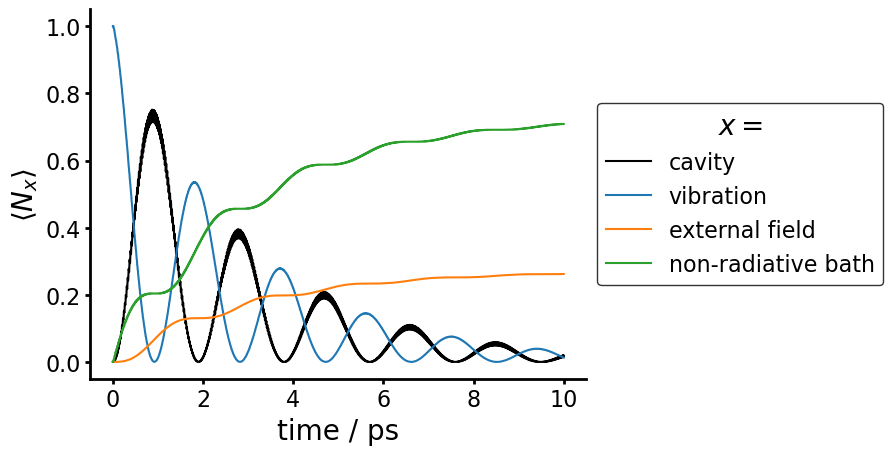

In [29]:
parameters['field size'] = 500
parameters['bath size'] = 500

polEn, polStates, siteEn = twa.polariton_modes(parameters)
polDispl = twa.pol_displacement(parameters, polEn, polStates, siteEn)

nCav = twa.oc_dynamics(parameters, polEn, polStates, siteEn, polDispl, subsystem='cavity')
nVib = twa.oc_dynamics(parameters, polEn, polStates, siteEn, polDispl, subsystem='vibration')
nField = twa.oc_dynamics(parameters, polEn, polStates, siteEn, polDispl, subsystem='field')
nBath = twa.oc_dynamics(parameters, polEn, polStates, siteEn, polDispl, subsystem='bath')

plt.plot(nCav[0], nCav[1], label='cavity', color='k')
plt.plot(nVib[0], nVib[1], label='vibration', color='tab:blue')
plt.plot(nField[0], nField[1], label='external field', color='tab:orange')
plt.plot(nBath[0], nBath[1], label='non-radiative bath', color='tab:green')
plot_params()

## Figure 1
Figure 1 studies the parameter space of an isolated cavity-vibration system. Specifically it looks at the maximum number of photons as a function of the cavity-vibration (Jaynes-Cumming) coupling strength ($g$).

Below shows $\langle N_\textrm{vib} \rangle$ at $S = 0.75$ for different $g$ values.

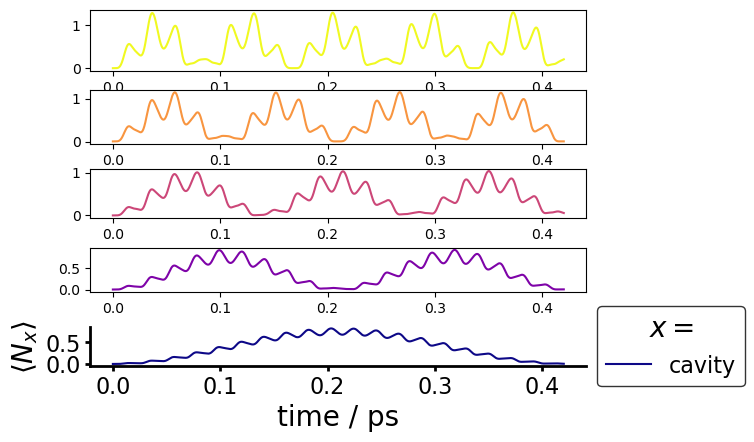

In [50]:
# isolated system:
parameters['field size'] = 0
parameters['bath size'] = 0
# shorten time to capture strong coupling oscillations
parameters['final time'] = 0.42

parameters['Huang-Rhys'] = 0.75

gRange = np.linspace(0.18e-3, 0.9e-3, 5)
nCavOut = np.zeros((gRange.size + 1, parameters['time steps']))
colors = plt.cm.plasma(np.linspace(0, 1, gRange.size))
fig, axs = plt.subplots(gRange.size)
for i, g in enumerate(gRange):
    parameters['coupling'] = g
    polEn, polStates, siteEn = twa.polariton_modes(parameters)
    polDispl = twa.pol_displacement(parameters, polEn, polStates, siteEn)
    nCav = twa.oc_dynamics(parameters, polEn, polStates, siteEn, polDispl, subsystem='cavity')
    if i == 0:
        nCavOut[i] = nCav[0]
        nCavOut[i + 1] =  nCav[1]
    else:
        nCavOut[i + 1] = nCav[1]
    axs[gRange.size - 1 - i].plot(nCav[0], nCav[1], label='cavity', color=colors[i])
    axs[gRange.size - 1 - i].set_aspect(0.04)
    plot_params()

In [46]:
np.savetxt('data/g_stacked_ncav', nCavOut)

Below shows the calculation of the $g$ vs $S$ heatmap.

In [64]:
parameters['time steps'] = 8000
parameters['final time'] = 48.3778

gRange = np.linspace(0.01e-3, 1e-3, 100)
sRange = np.linspace(0, 1, 100)
nCavMax = np.zeros((gRange.size, sRange.size))
for i, g in enumerate(gRange):
    for j, s in enumerate(sRange):
        parameters['coupling'] = g
        parameters['Huang-Rhys'] = s
        polEn, polStates, siteEn = twa.polariton_modes(parameters)
        polDispl = twa.pol_displacement(parameters, polEn, polStates, siteEn)
        nCav = twa.oc_dynamics(parameters, polEn, polStates, siteEn, polDispl, subsystem='cavity')
        nCavMax[i, j] = np.max(nCav[1])

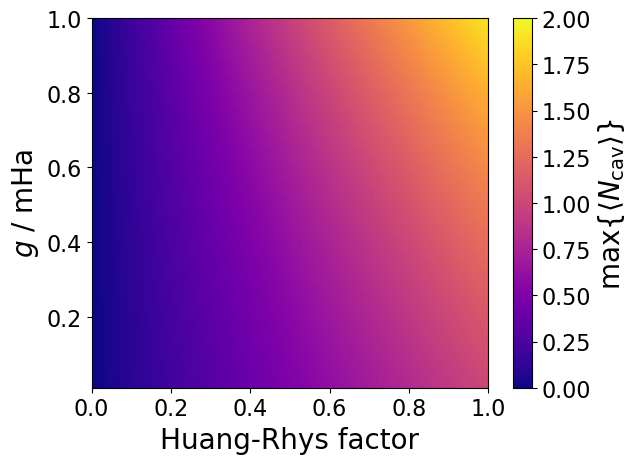

In [65]:
plt.imshow(nCavMax, cmap='plasma', aspect='auto', extent=[sRange[0], sRange[-1], gRange[0] * 1000, gRange[-1] * 1000], origin='lower', vmin=0, vmax=np.round(nCavMax[-1, -1] + 0.05, 1))
plt.ylabel(r'$g$ / mHa', fontsize=20)
plt.xlabel(r'Huang-Rhys factor', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = plt.colorbar()
cbar.set_label(label=r'max{$\langle N_\mathrm{cav} \rangle$}', size=20)
for t in cbar.ax.get_yticklabels():
    t.set_fontsize(16)

In [66]:
np.savetxt('data/g_vs_S_nCavMax', nCavMax)